In [13]:
import pandas as pd

filename = "real_estate_data.csv"
df = pd.read_csv(filename)

# display data
df.head(10)

,City,District,Price ($),Area (m²),Rooms,Floor,Year Built,Property Type,Distance to Metro (km)
0,New York,Staten Island,3631882,219,2,27,1950,secondary,2.92
1,New York,Bronx,4072486,223,2,33,1908,secondary,0.83
2,New York,Staten Island,4355652,247,2,13,1911,secondary,2.03
3,New York,Manhattan,1580002,38,4,18,1973,new_build,0.84
4,New York,Brooklyn,3719472,222,4,44,1964,secondary,4.59
5,New York,Bronx,214401,133,5,35,2009,secondary,1.44
6,New York,Manhattan,1336293,123,5,2,1930,new_build,3.15
7,New York,Staten Island,4138241,174,5,14,1962,new_build,4.02
8,New York,Manhattan,4804878,191,4,20,1963,new_build,4.52
9,New York,Staten Island,910597,94,3,36,1966,new_build,4.13


In [14]:
# Check for missing values
missing_values = df.isnull().sum()
display(missing_values)

City                      0
District                  0
Price ($)                 0
Area (m²)                 0
Rooms                     0
Floor                     0
Year Built                0
Property Type             0
Distance to Metro (km)    0
dtype: int64

In [15]:
# Fill or drop missing values (fill numerical columns with media)
numeric_cols = df.select_dtypes(include=["number"]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [16]:
# Display cleaned data
df.head(10)

,City,District,Price ($),Area (m²),Rooms,Floor,Year Built,Property Type,Distance to Metro (km)
0,New York,Staten Island,3631882,219,2,27,1950,secondary,2.92
1,New York,Bronx,4072486,223,2,33,1908,secondary,0.83
2,New York,Staten Island,4355652,247,2,13,1911,secondary,2.03
3,New York,Manhattan,1580002,38,4,18,1973,new_build,0.84
4,New York,Brooklyn,3719472,222,4,44,1964,secondary,4.59
5,New York,Bronx,214401,133,5,35,2009,secondary,1.44
6,New York,Manhattan,1336293,123,5,2,1930,new_build,3.15
7,New York,Staten Island,4138241,174,5,14,1962,new_build,4.02
8,New York,Manhattan,4804878,191,4,20,1963,new_build,4.52
9,New York,Staten Island,910597,94,3,36,1966,new_build,4.13


In [26]:
# Add the column "Price per square meter"
df["Price per m²"] = df["Price ($)"] / df["Area (m²)"]

# Average price of real estate in different cities
average_price_per_city = df.groupby("City")["Price ($)"].mean().reset_index()

# Find the most expensive and the cheapest apartments
most_expensive = df.loc[df["Price ($)"].idxmax()]
cheapest = df.loc[df["Price ($)"].idxmin()]

# We calculate the correlation of price with the distance to the metro, the number of rooms and the year of construction
correlation_matrix = df[["Price ($)", "Distance to Metro (km)", "Rooms", "Year Built"]].corr()

display(average_price_per_city.style.set_caption("Average price of real estate in cities"))
display(pd.DataFrame([most_expensive]).style.set_caption("The most expensive apartment"))
display(pd.DataFrame([cheapest]).style.set_caption("The cheapest apartment"))
display(correlation_matrix.style.set_caption("Correlation of price with parameters"))

,City,Price ($)
0,New York,2662085.680000


,City,District,Price ($),Area (m²),Rooms,Floor,Year Built,Property Type,Distance to Metro (km),Price per m²
33,New York,Bronx,4943520,166,2,34,1918,new_build,3.700000,29780.240964


,City,District,Price ($),Area (m²),Rooms,Floor,Year Built,Property Type,Distance to Metro (km),Price per m²
5,New York,Bronx,214401,133,5,35,2009,secondary,1.440000,1612.037594


,Price ($),Distance to Metro (km),Rooms,Year Built
Price ($),1.000000,-0.033878,-0.179233,0.015573
Distance to Metro (km),-0.033878,1.000000,0.006626,0.051232
Rooms,-0.179233,0.006626,1.000000,0.203562
Year Built,0.015573,0.051232,0.203562,1.000000


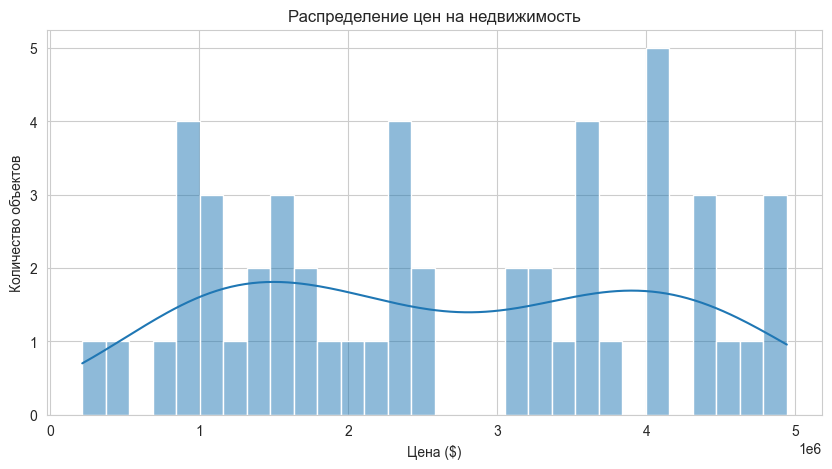

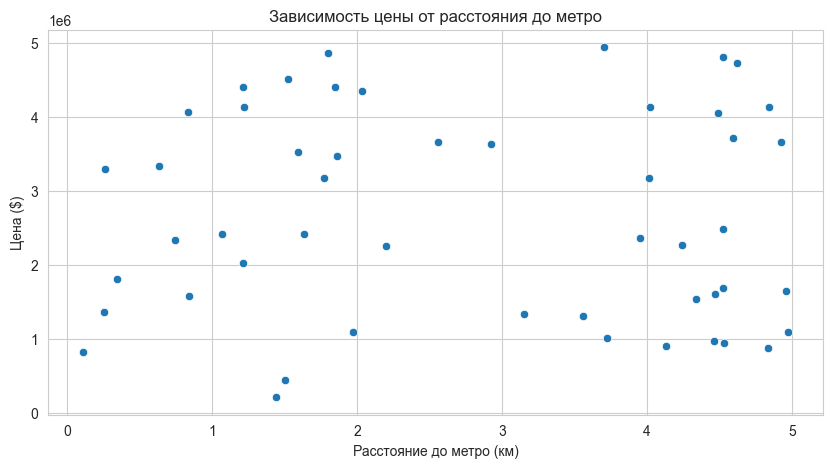

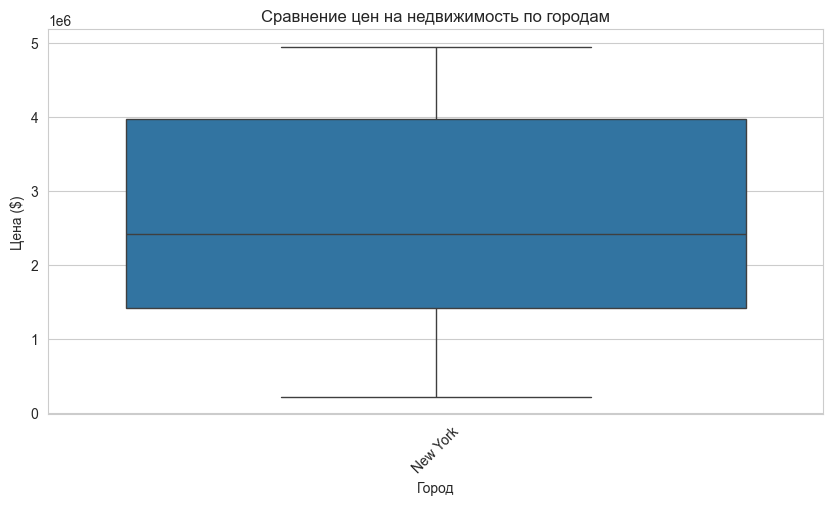

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Histogram of price distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["Price ($)"], bins=30, kde=True)
plt.xlabel("Price ($)")
plt.ylabel("Number of objects")
plt.title("Distribution of real estate prices")
plt.show()

# Graph of price dependence on distance to metro
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Distance to Metro (km)"], y=df["Price ($)"])
plt.xlabel("Distance to metro (km)")
plt.ylabel("Price ($)")
plt.title("Price dependence on distance to metro")
plt.show()

# Price comparison by city (box chart)
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["City"], y=df["Price ($)"])
plt.xlabel("City")
plt.ylabel("Price ($)")
plt.title("Comparison of real estate prices by city")
plt.xticks(rotation=45)
plt.show()